In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as mn
%matplotlib inline

#loading dataset
data=pd.read_csv(r"C:\Users\kdbts\OneDrive\文档\DS Projects\train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#checking null values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

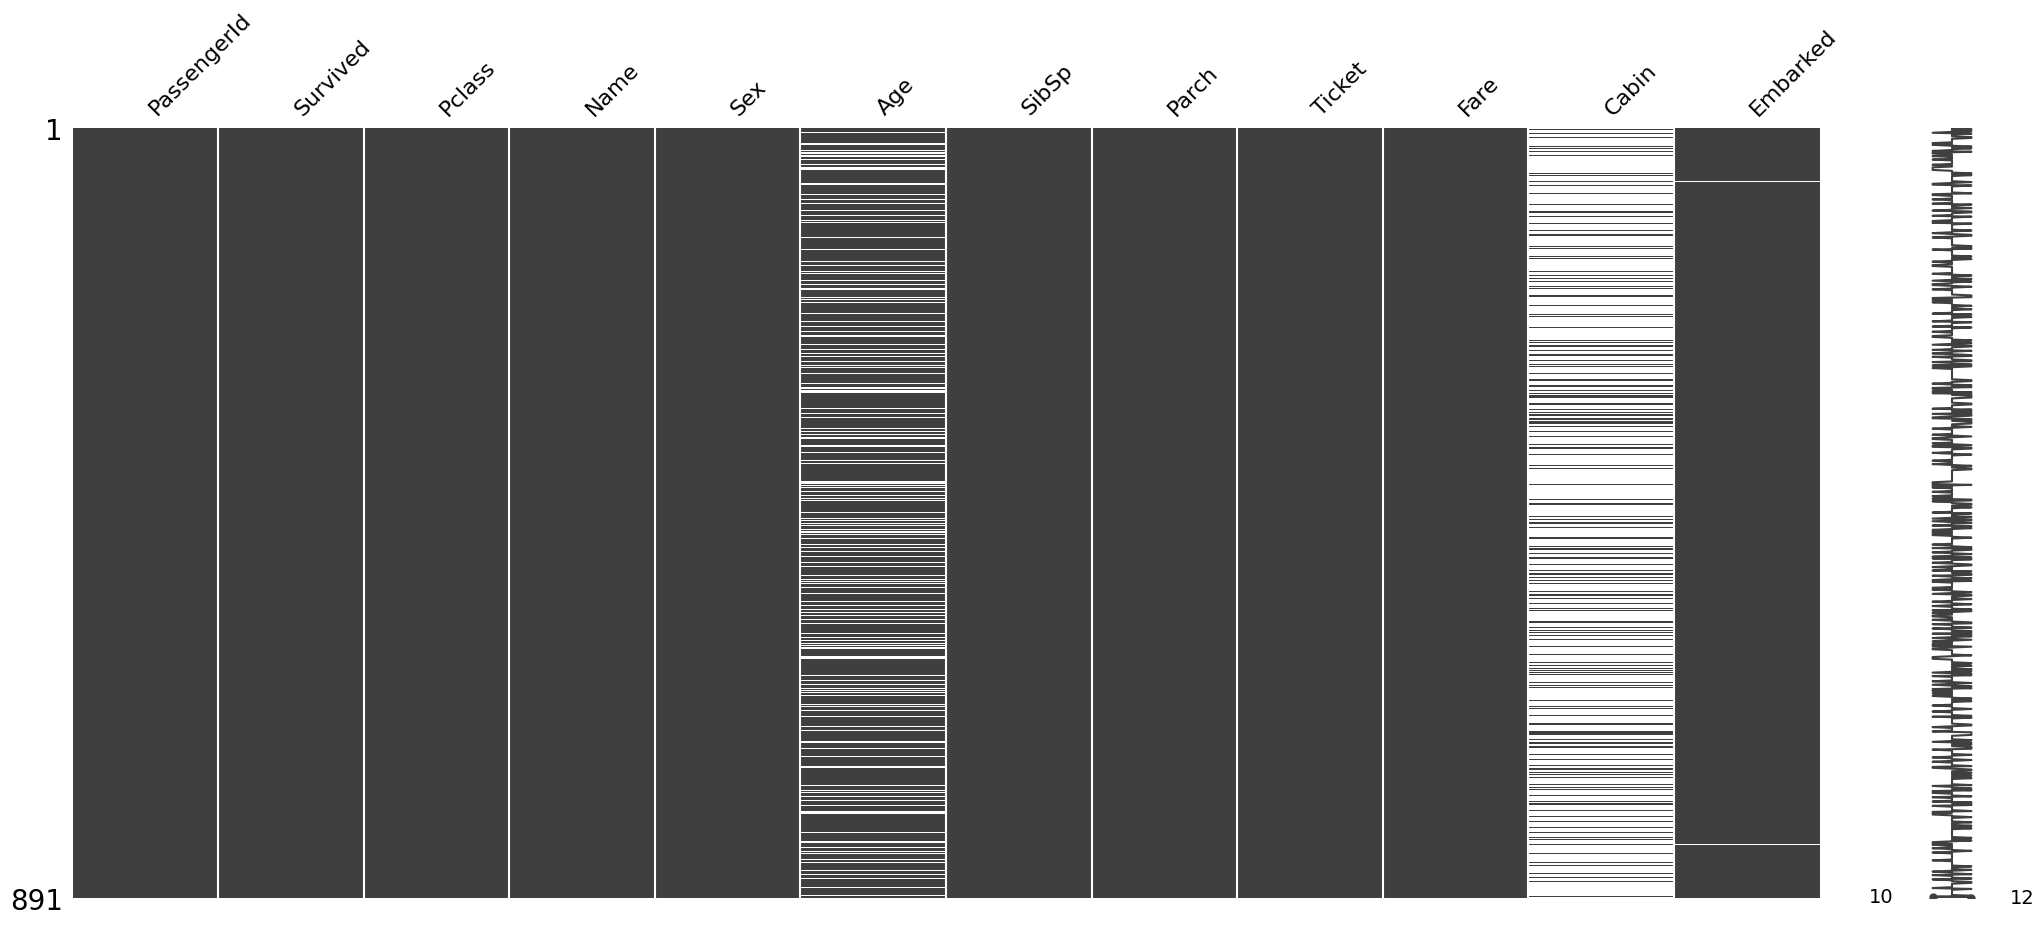

In [5]:
mn.matrix(data)

<Axes: ylabel='Age'>

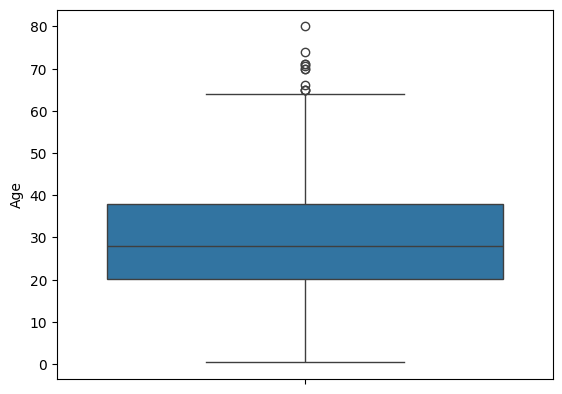

In [6]:
sns.boxplot(data['Age'])

In [8]:
#Removing null values in age
def mean_median(df,variable):
    df[variable+'_mean']=df[variable].fillna(df[variable].mean())
    df[variable+'_median']=df[variable].fillna(df[variable].median())

mean_median(data,'Age')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_mean,Age_median
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,35.0


In [9]:
data['Age_nan'] = np.where(data['Age'].isnull,0,1)

In [18]:
def Age_fill(df,variable):
    df[variable+'_random'] = df[variable]
    random_values = df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    random_values.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random'] = random_values
Age_fill(data,'Age')

In [19]:
extreme = (data['Age'].mean()+(3*data['Age'].std()))
def End_distribution(df,variable,extreme):
    df[variable+'_end_distribution'] = df[variable].fillna(extreme)
End_distribution(data,'Age',extreme)

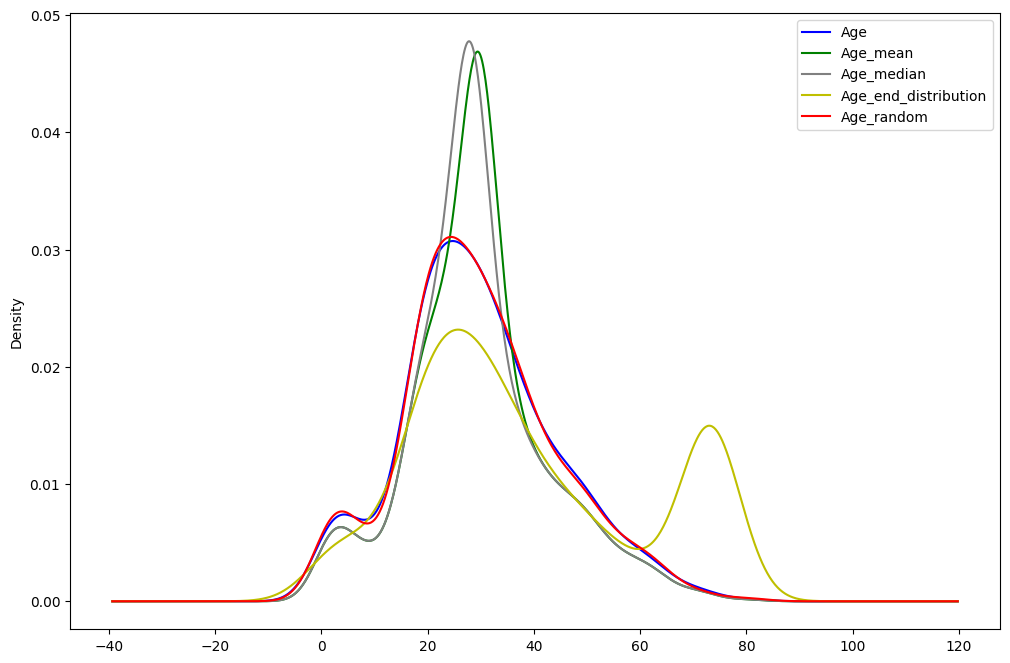

In [20]:
plt.figure(figsize=(12,8))
data.Age.plot(kind='kde',color='b')
data.Age_mean.plot(kind='kde',color='g')
data.Age_median.plot(kind='kde',color='grey')
data.Age_end_distribution.plot(kind='kde',color='y')
data.Age_random.plot(kind='kde',color='r')
plt.legend()


<Axes: >

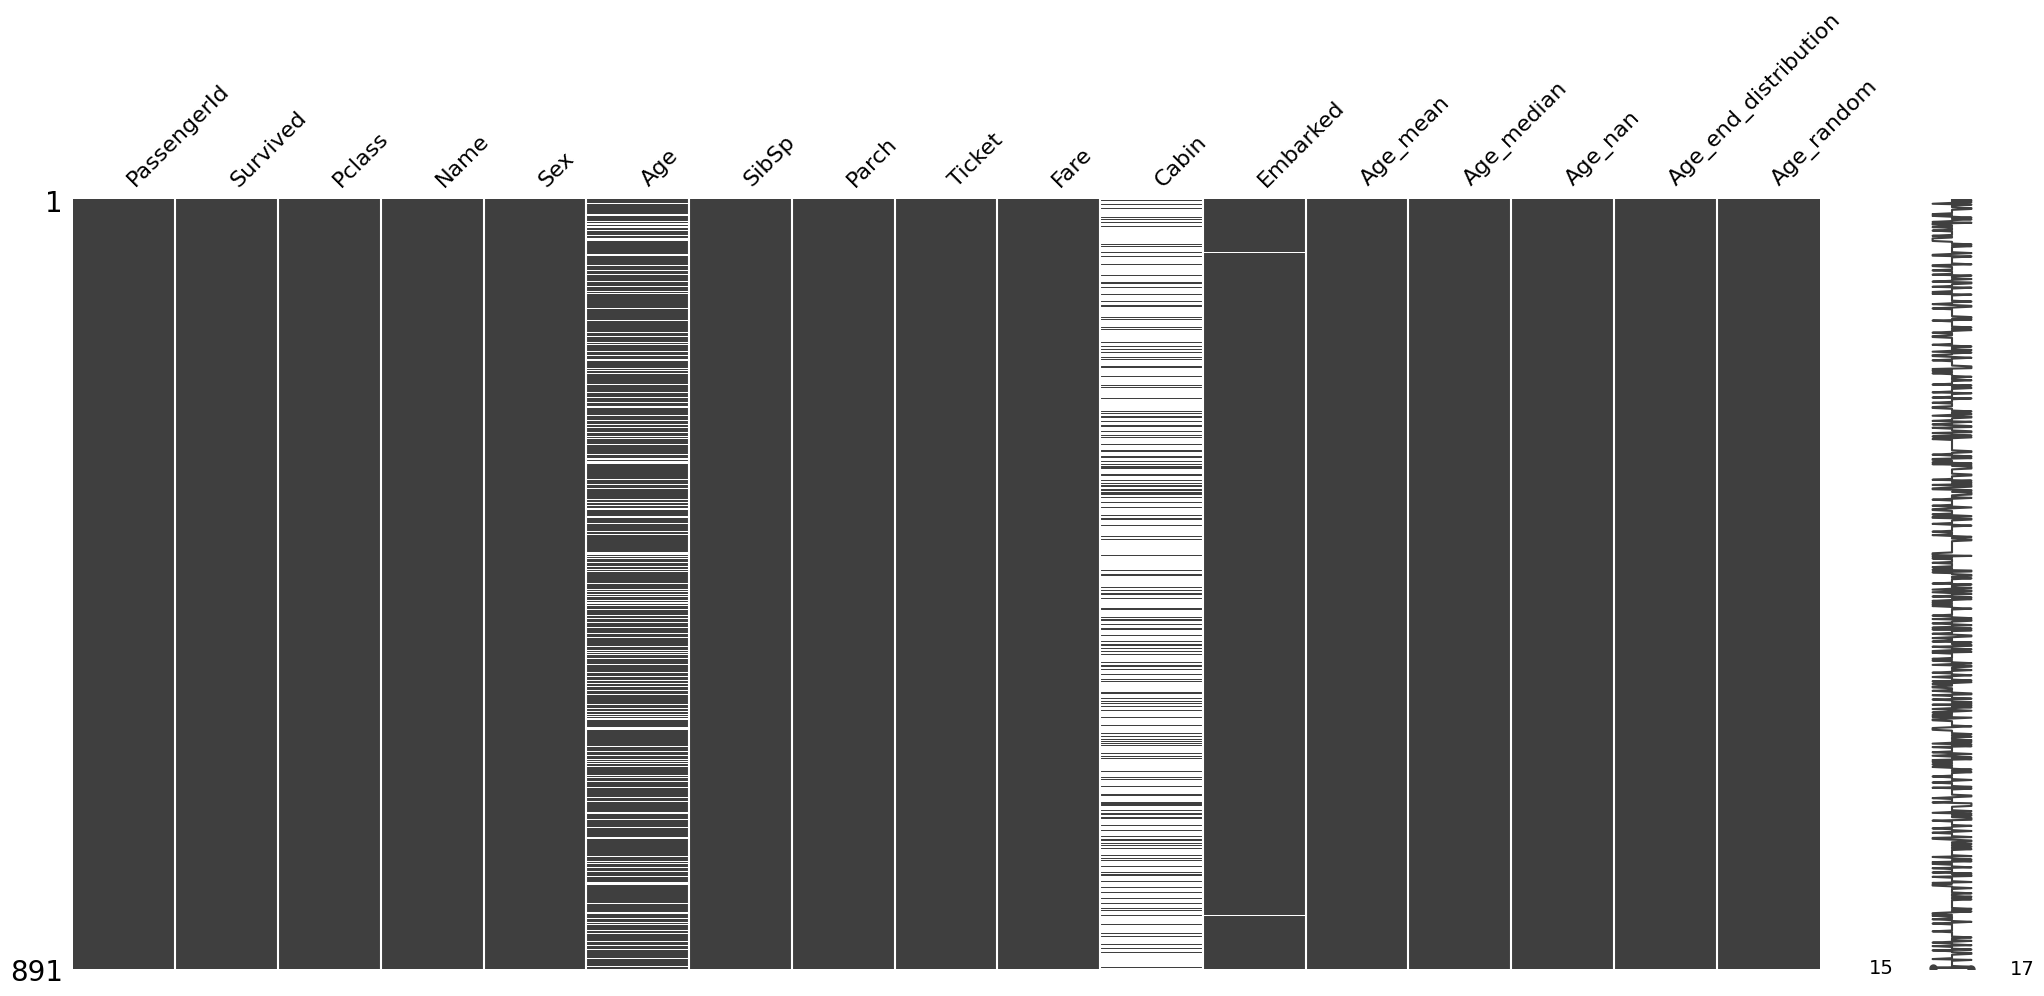

In [21]:
#handling embarked column
mn.matrix(data)

In [22]:
data['Embarked'].isnull().sum()

np.int64(2)

In [23]:
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

<Axes: xlabel='count', ylabel='Embarked'>

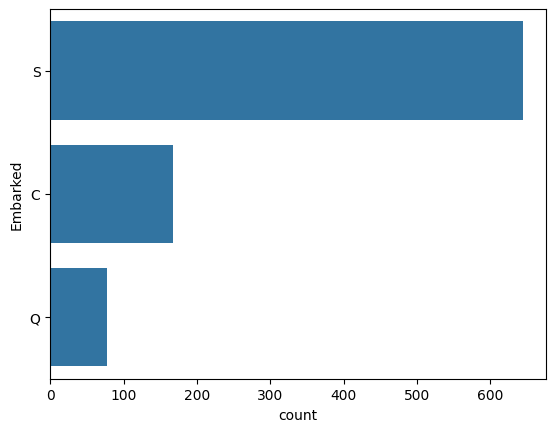

In [24]:
sns.countplot(data['Embarked'])

In [25]:
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode()[0])
data['Embarked'].isnull().sum()

np.int64(0)

<Axes: >

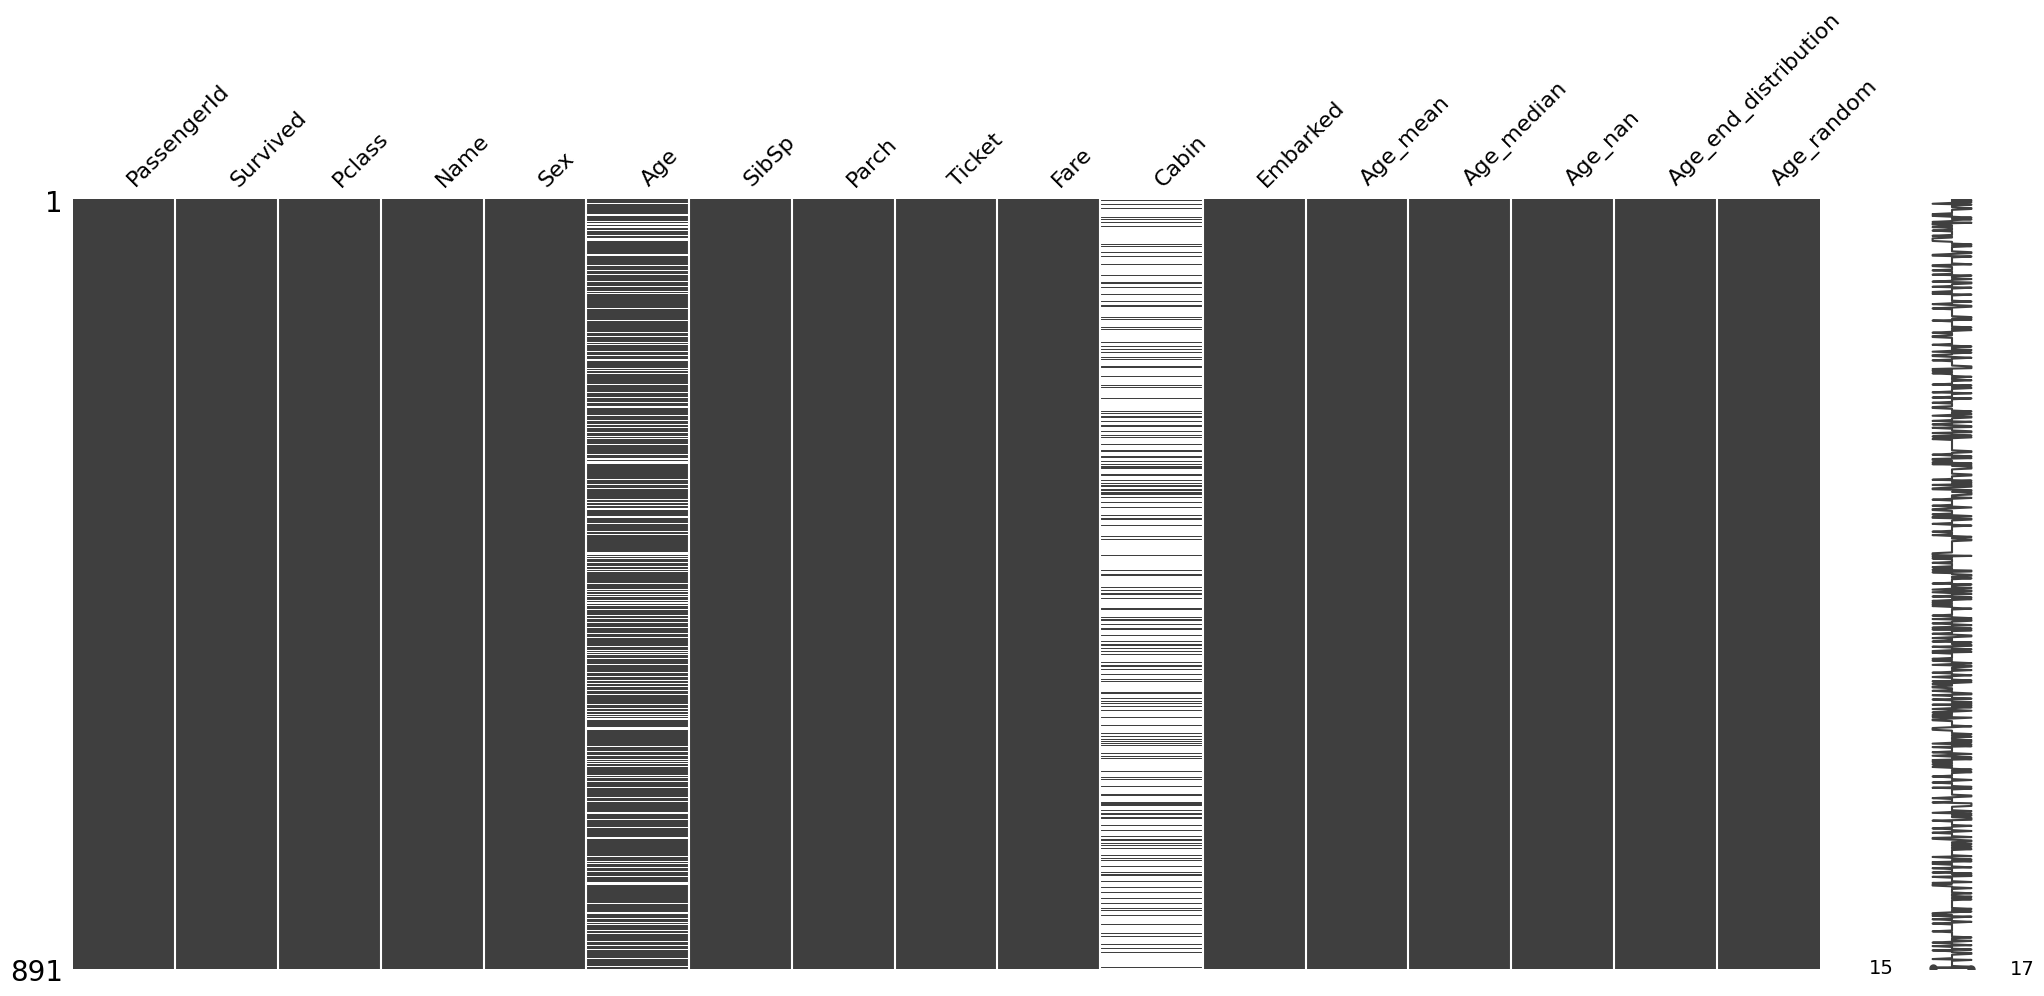

In [26]:
#Handling Cabin column
mn.matrix(data)

In [27]:
data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [28]:
#replace NaN with frequent category
most_freq_cate = data['Cabin'].value_counts().index[0]
data['Cabin_Freq_Cate'] = data['Cabin'].fillna(most_freq_cate)

In [29]:
#Replace NaN with Mode
mode= data['Cabin'].mode()[1]
data['Cabin_mode'] = data['Cabin'].fillna(mode)

In [30]:
#Replace NaN with New category
new_cate = ' Unknown'
data['Cabin_new_feature'] = data['Cabin'].fillna(new_cate)

<Axes: >

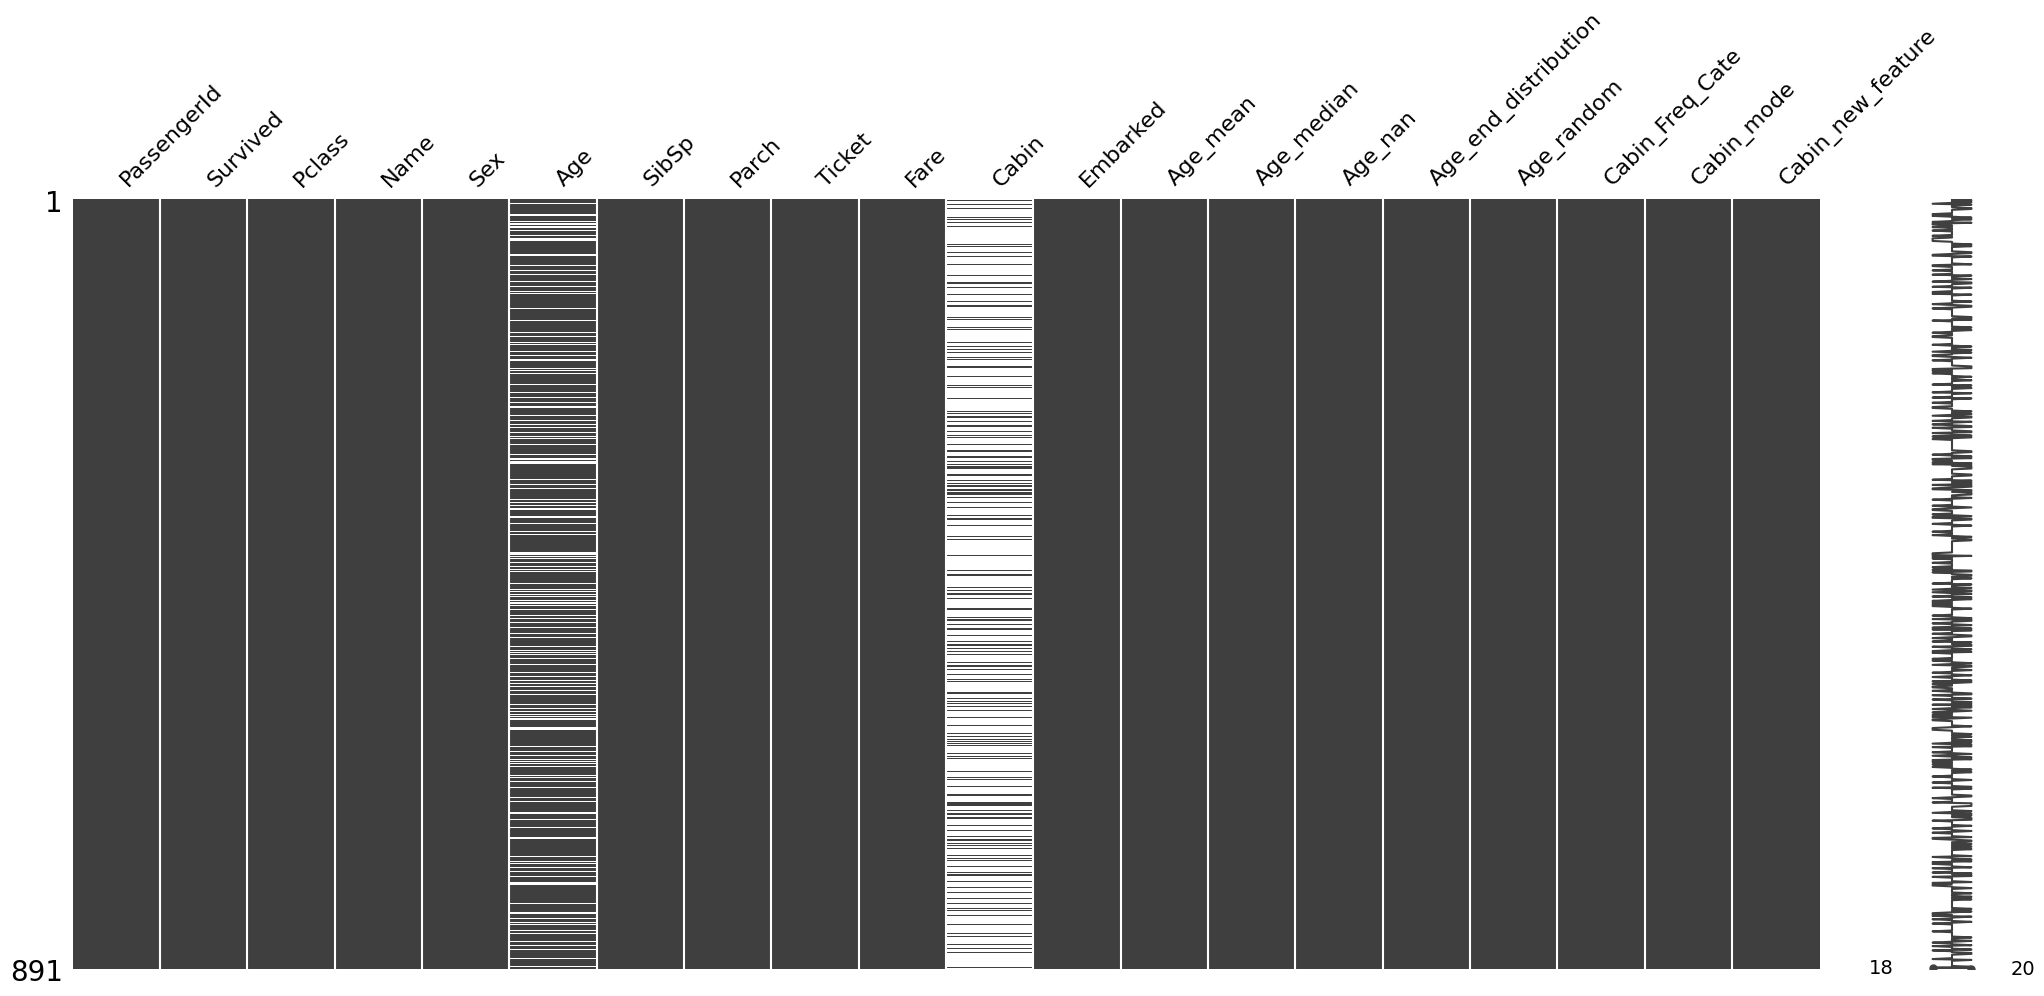

In [31]:
mn.matrix(data)